<a href="https://colab.research.google.com/github/fggrava/Challenge_ONE_Data_Science_Alura_Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url,)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [41]:
loja['Lojas'] = 'Loja_1'
loja2['Lojas'] = 'Loja_2'
loja3['Lojas'] = 'Loja_3'
loja4['Lojas'] = 'Loja_4'
Banco_de_dados_unificado = pd.concat([loja, loja2, loja3, loja4])
Banco_de_dados_unificado.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Lojas
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja_1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja_1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja_1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja_1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja_1


#1. Análise do faturamento


<Axes: title={'center': 'Comparação do faturamento entre Lojas'}, xlabel='Faturamento', ylabel='Lojas'>

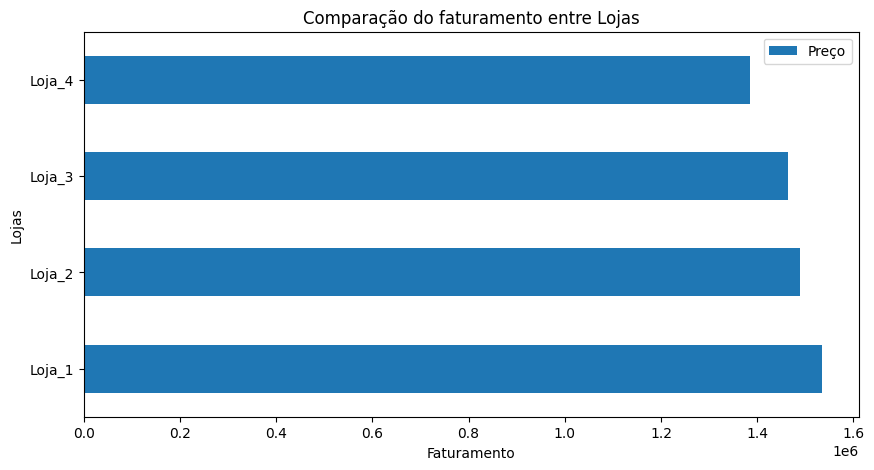

In [42]:
Analise_Faturamento = Banco_de_dados_unificado[['Lojas', 'Preço', 'Data da Compra']]
Analise_Faturamento.groupby('Lojas').sum().plot(kind = 'barh', figsize = (10,5), title = 'Comparação do faturamento entre Lojas', xlabel = 'Faturamento')


In [52]:
Analise_Faturamento.groupby('Lojas').sum()

,Preço,Data da Compra,Ano
Lojas,,,
Loja_1,1534509.12,16/01/202118/05/202215/03/202103/05/202207/11/...,2021202220212022202020202021202120222020202020...
Loja_2,1488459.06,04/08/202126/11/202022/10/202104/05/202226/02/...,2021202020212022202220212020202220222021202020...
Loja_3,1464025.03,17/12/202110/02/202122/01/202322/03/202212/01/...,2021202120232022202220222020202220212022202120...
Loja_4,1384497.58,11/11/202203/01/202025/12/202223/11/202125/04/...,2022202020222021202220202021202220222022202220...


<ipython-input-43-9084ec09c7f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Analise_Faturamento ['Ano'] = Analise_Faturamento['Data da Compra'].str[6:]


<Axes: title={'center': 'Comparação do faturamento entre Lojas'}, xlabel='Faturamento'>

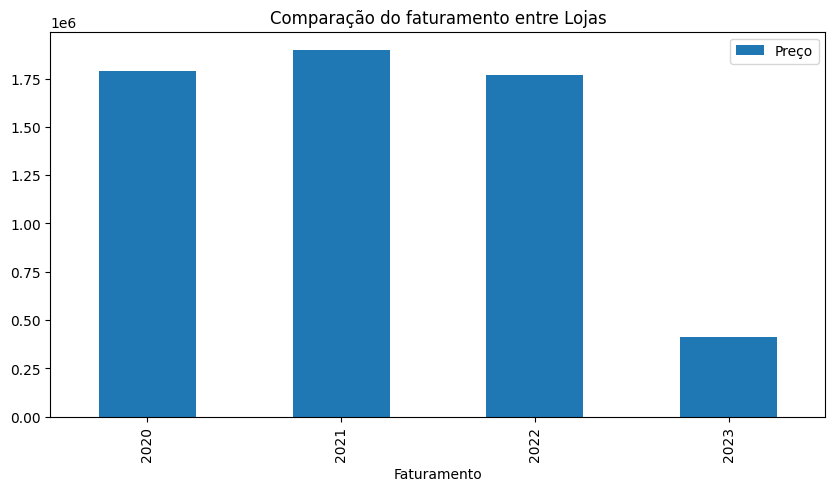

In [43]:
Analise_Faturamento ['Ano'] = Analise_Faturamento['Data da Compra'].str[6:]
Analise_Faturamento.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Comparação do faturamento entre Lojas', xlabel = 'Faturamento')


<ipython-input-51-62a75190dba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Faturamento_loja ['Ano'] = Faturamento_loja ['Data da Compra'].str[6:]
<ipython-input-51-62a75190dba0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Faturamento_loja2 ['Ano'] = Faturamento_loja2 ['Data da Compra'].str[6:]
<ipython-input-51-62a75190dba0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

<Axes: title={'center': 'Faturamento por ano Loja 4'}, xlabel='Faturamento'>

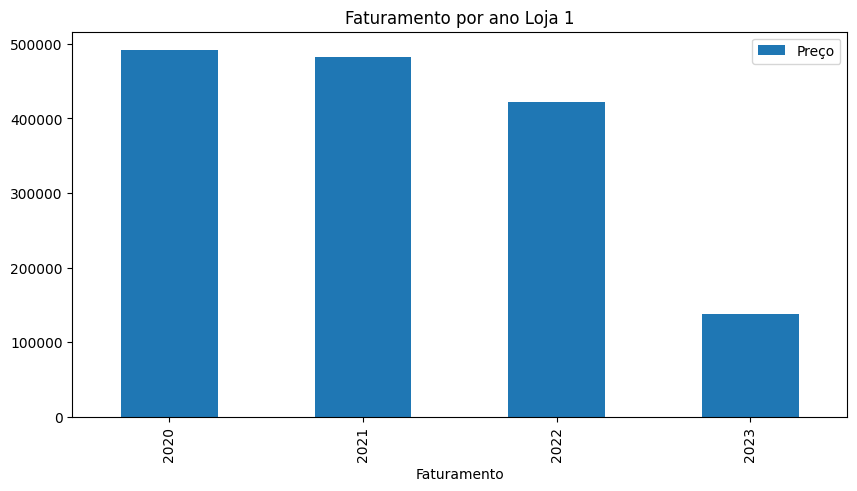

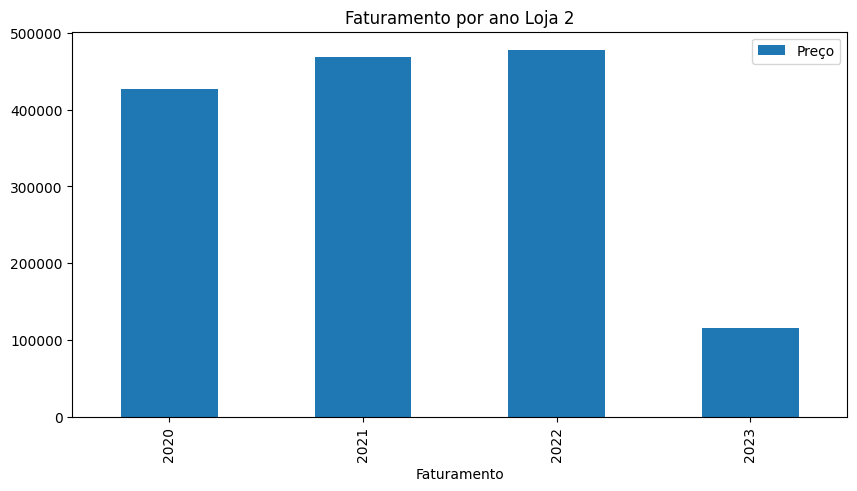

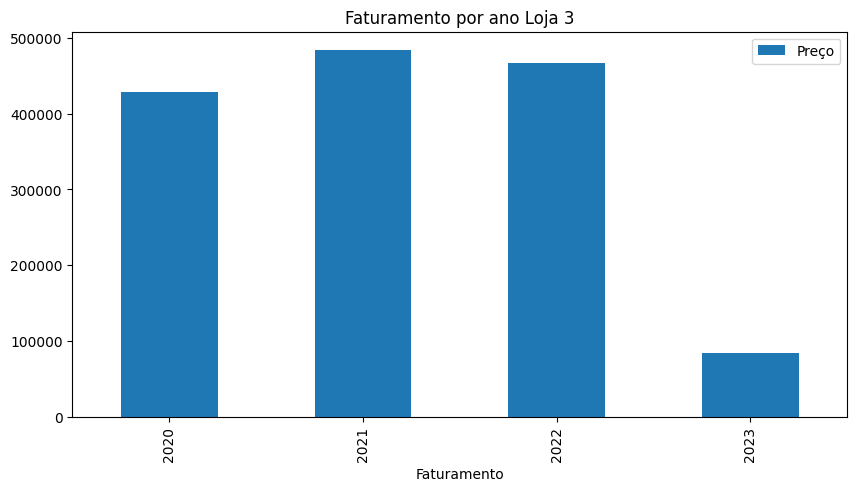

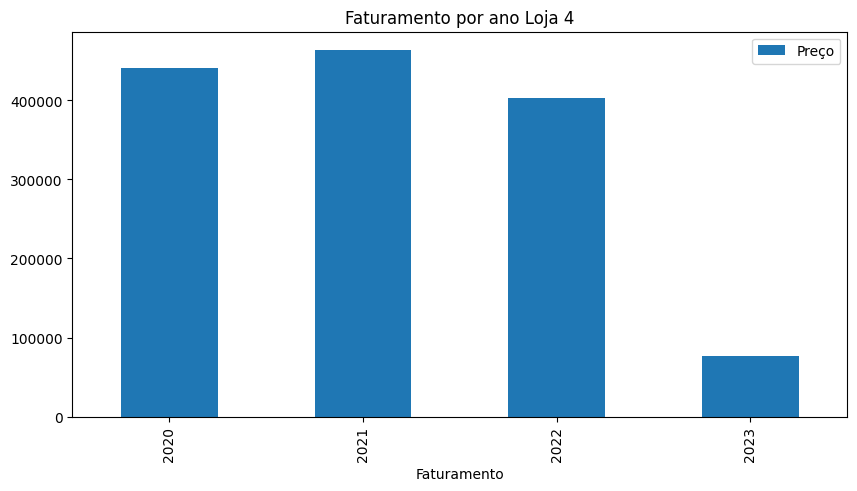

In [51]:
Faturamento_loja = loja [['Preço', 'Data da Compra']]
Faturamento_loja ['Ano'] = Faturamento_loja ['Data da Compra'].str[6:]
Faturamento_loja.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 1', xlabel = 'Faturamento')

Faturamento_loja2 = loja2 [['Preço', 'Data da Compra']]
Faturamento_loja2 ['Ano'] = Faturamento_loja2 ['Data da Compra'].str[6:]
Faturamento_loja2.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 2', xlabel = 'Faturamento')

Faturamento_loja3 = loja3 [['Preço', 'Data da Compra']]
Faturamento_loja3 ['Ano'] = Faturamento_loja3 ['Data da Compra'].str[6:]
Faturamento_loja3.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 3', xlabel = 'Faturamento')

Faturamento_loja4 = loja4 [['Preço', 'Data da Compra']]
Faturamento_loja4 ['Ano'] = Faturamento_loja4 ['Data da Compra'].str[6:]
Faturamento_loja4.groupby('Ano').sum().plot(kind = 'bar', figsize = (10,5), title = 'Faturamento por ano Loja 4', xlabel = 'Faturamento')

# 2. Vendas por Categoria


<Axes: xlabel='Categoria do Produto'>

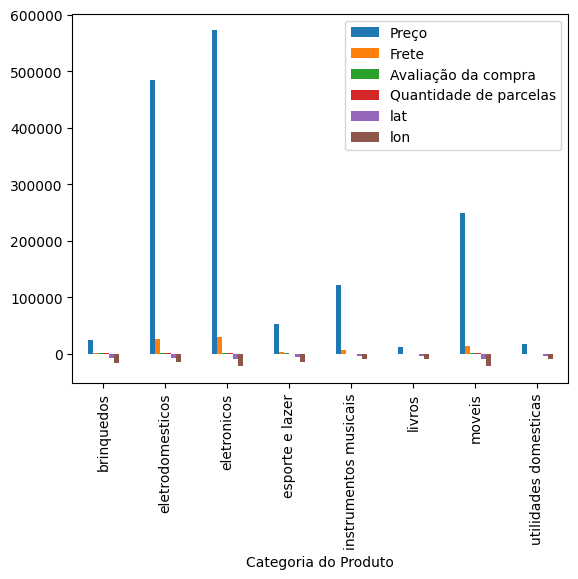

In [5]:
loja.groupby('Categoria do Produto').sum().plot(kind = 'bar')


In [6]:
loja['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
